In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report


In [38]:
def evaluate_model(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    error = (fp + fn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    print("Confusion Matrix:")
    print(confusion_mat)
    print()
    print("Accuracy:", accuracy)
    print("Error:", error)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

In [39]:
labels = pd.read_csv(r'D:\University\T6\Machine Learning\My Machine Learning\Final project\new_dataset.csv' , header = None)
features = pd.read_csv(r"D:\University\T6\Machine Learning\My Machine Learning\Final project\features.csv" , header = None)
files_name = pd.read_csv(r'D:\University\T6\Machine Learning\My Machine Learning\Final project\labels.csv' , header = None)
X_train, X_test, y_train, y_test,files_name_train , files_name_test = train_test_split(features, labels, files_name,test_size=0.3, random_state=42)

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix:
[[516   3]
 [  1 506]]

Accuracy: 0.9961013645224172
Error: 0.003898635477582846
Precision: 0.9941060903732809
Recall: 0.9980276134122288
F1-Score: 0.9960629921259843


In [41]:
y_test_array = np.array(np.concatenate(y_test.values.tolist()))
files_name_test = files_name_test.values.tolist()

['810100503_fake_stable_jungle_5.jpeg']


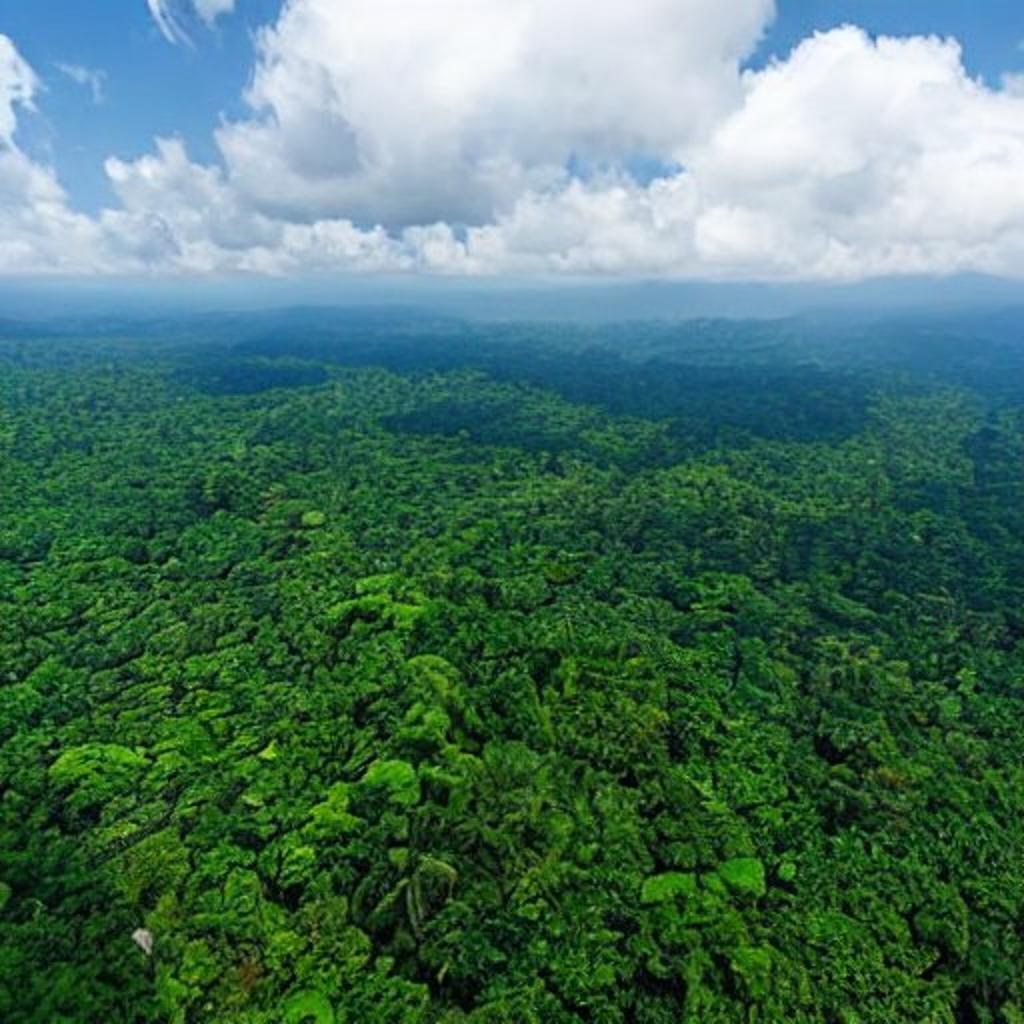

['810100406-fake-dalle-sea-3.jpeg']


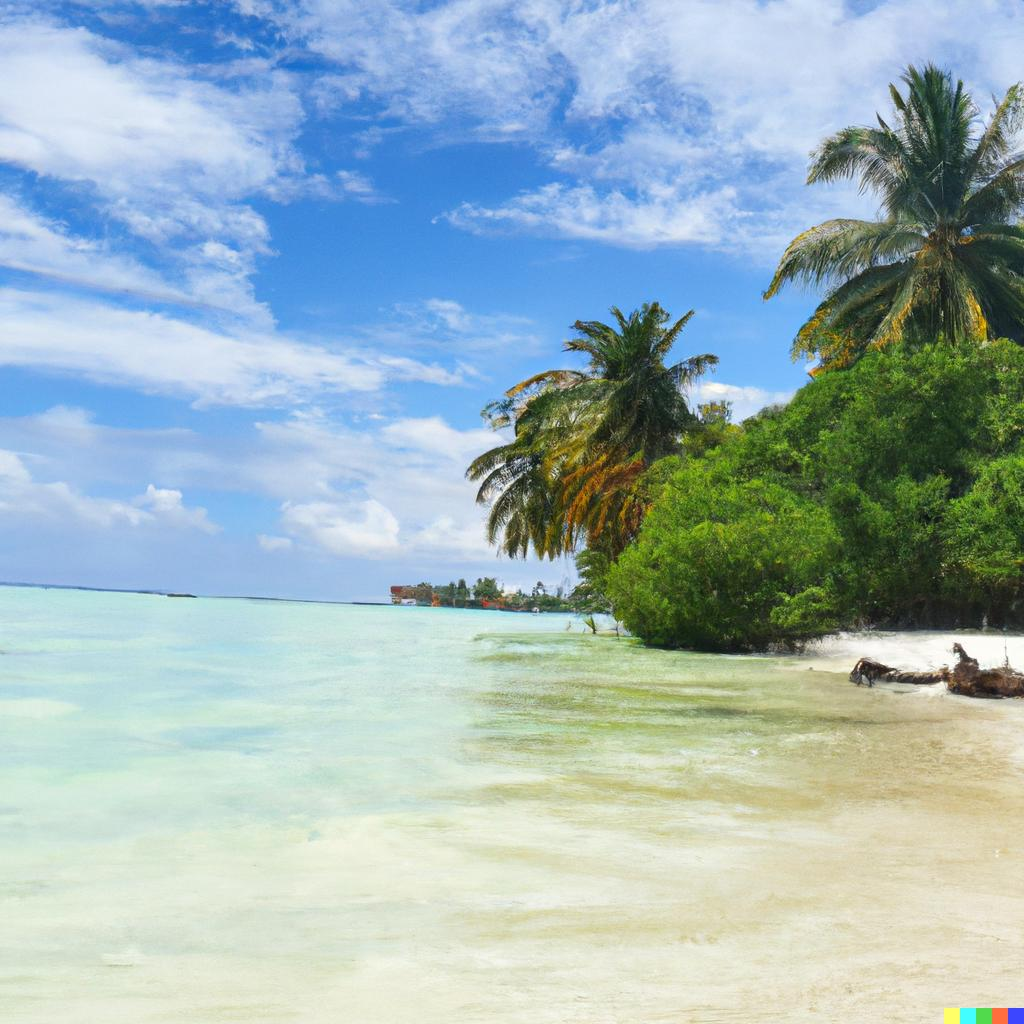

['810101201_fake_dallemini_jungle_4.jpeg']


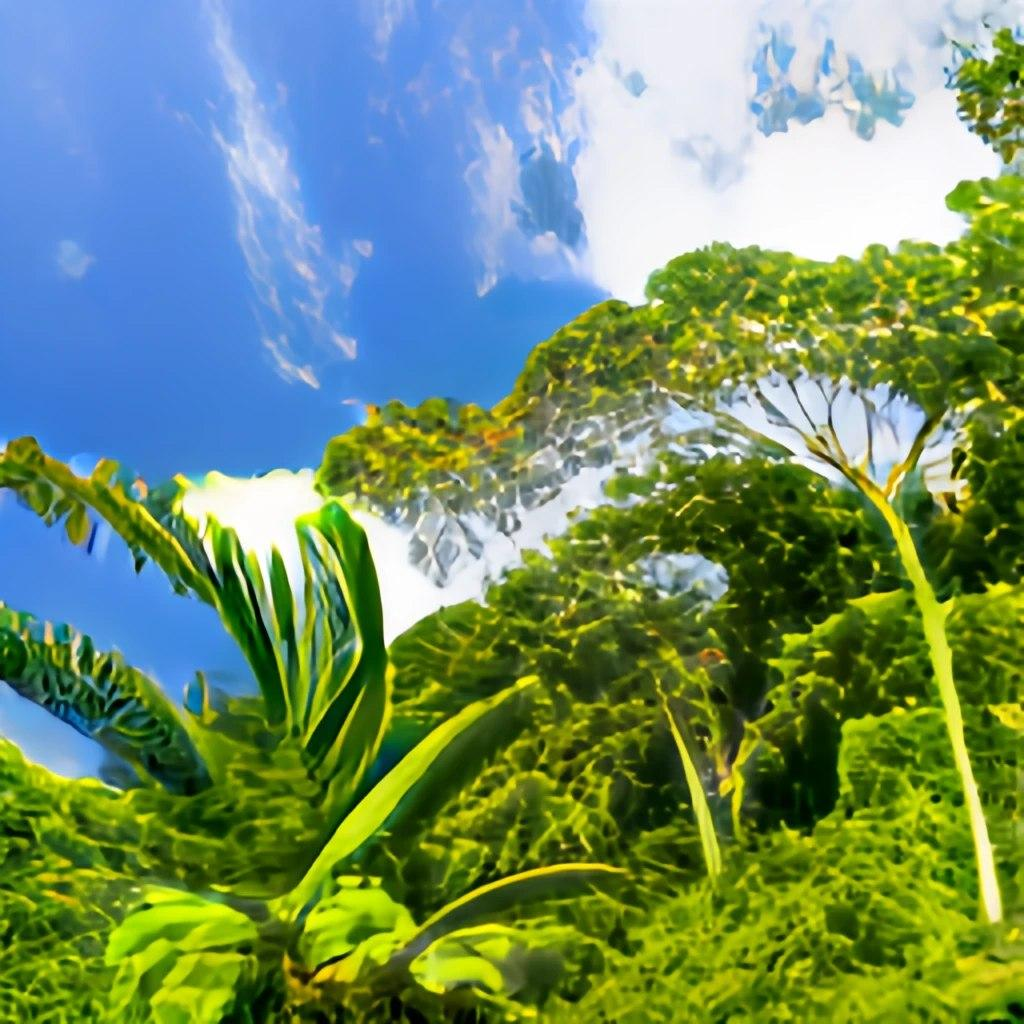

['810101356_real_none_jungle_10.jpg']


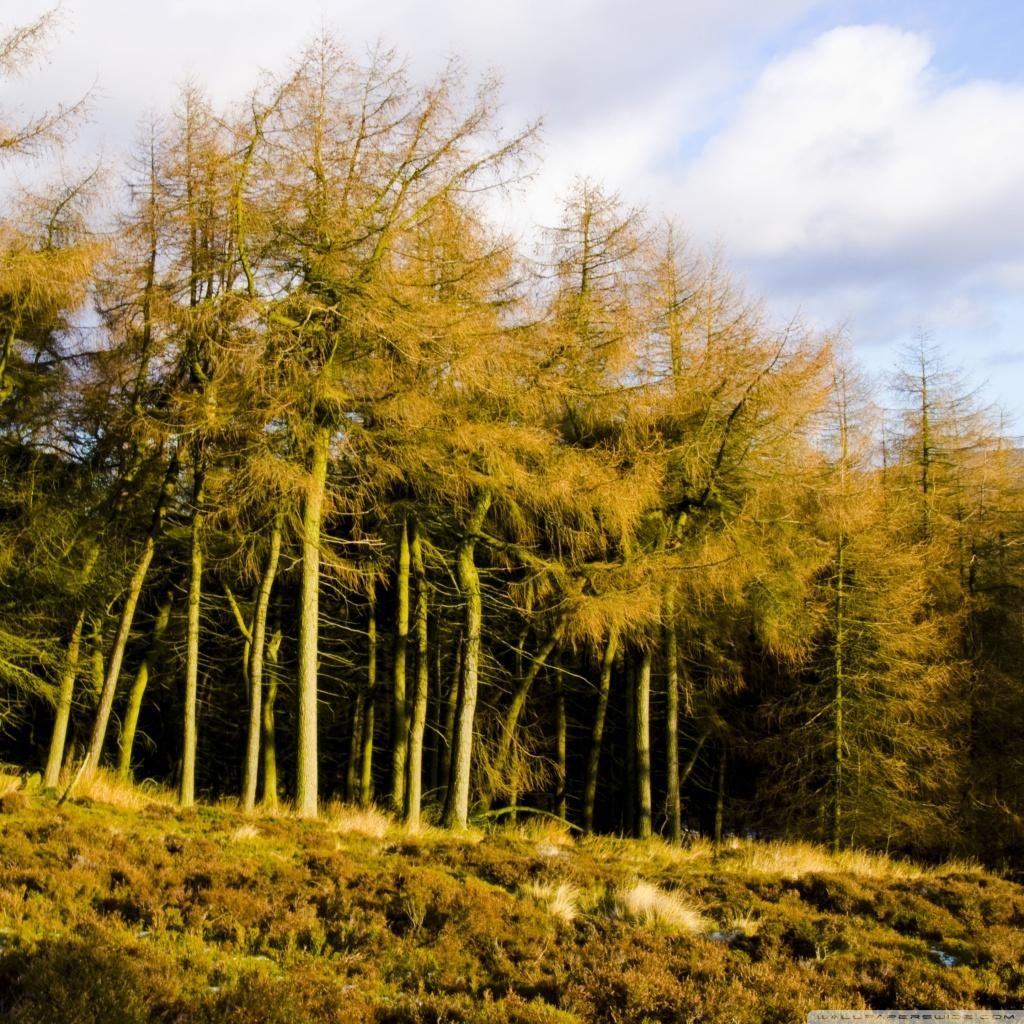

In [42]:
from IPython.display import Image
loc = r"D:\University\T6\Machine Learning\My Machine Learning\Final project\All_in__One_resized\\" 
for i in range(len(X_test)):
    if(y_pred[i]  != y_test_array[i]):
        print(files_name_test[i])
        nameoffile = files_name_test[i][0]
        display(Image(filename = loc + nameoffile))


In [43]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

evaluate_model(y_test, y_pred)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[518   1]
 [  0 507]]

Accuracy: 0.9990253411306043
Error: 0.0009746588693957114
Precision: 0.9980314960629921
Recall: 1.0
F1-Score: 0.9990147783251232


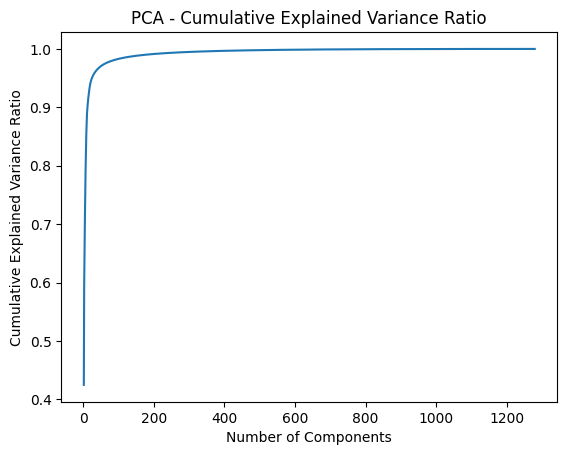

In [44]:
pca = PCA()
pca.fit(features)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()



In [45]:
pca = PCA(n_components=35)  # Set the desired number of components
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Initialize the SVM classifier
svm = SVC()

# Fit the classifier to the reduced training data
svm.fit(X_train_reduced, y_train)

# Make predictions on the reduced testing data
y_pred = svm.predict(X_test_reduced)

# Calculate the accuracy of the model

evaluate_model(y_test, y_pred)

Confusion Matrix:
[[517   2]
 [  0 507]]

Accuracy: 0.9980506822612085
Error: 0.001949317738791423
Precision: 0.9960707269155207
Recall: 1.0
F1-Score: 0.9980314960629921


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
